In [215]:
#Dependicies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Study data files
mouseMetadataPath = ('data/Mouse_metadata.csv')
studyResultsPath = ('data/Study_results.csv')

#Read the mouse data and study the results
mouseMetadata=pd.read_csv(mouseMetadataPath)
studyResults=pd.read_csv(studyResultsPath)

#Combine the data into a single data set
mouseStudy = pd.merge(studyResults,mouseMetadata, how='outer', on=["Mouse ID","Mouse ID"])
mouseStudy.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [216]:
#Checking number of mice
numberOfMice = mouseStudy['Mouse ID'].nunique()
numberOfMice

249

In [217]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicateMouseID=mouseStudy.loc[mouseStudy.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicateMouseID

array(['g989'], dtype=object)

In [218]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID
mouseStudyClean = mouseStudy[mouseStudy['Mouse ID'].isin(duplicateMouseID)==False]
mouseStudyClean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [219]:
#Checking the number of mice in the clean DataFrame
numberOfMiceClean = mouseStudyClean['Mouse ID'].nunique()
numberOfMiceClean

248

In [228]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean =mouseStudyClean.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median=mouseStudyClean.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance=mouseStudyClean.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
standardDeviation=mouseStudyClean.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM=mouseStudyClean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [232]:
# Assemble the resulting series into a single summary DataFrame.
summaryStatisticsTable = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance,
                                       "Tumor Volume Std. Dev":standardDeviation,"Tumor Volume Std. Err.":SEM})
summaryStatisticsTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [247]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summaryStatisticsTableAgg = mouseStudyClean.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])[['Tumor Volume (mm3)']]
summaryStatisticsTableAgg

C:\Users\Jackson\AppData\Local\Temp\ipykernel_244656\804155244.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summaryStatisticsTableAgg = mouseStudyClean.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])[['Tumor Volume (mm3)']]


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [257]:
#Determine the number of timepoints
micePerRegimen=mouseStudyClean['Drug Regimen'].value_counts()
micePerRegimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:>

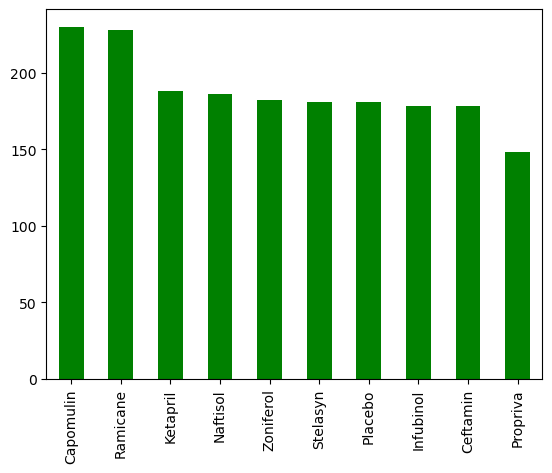

In [259]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micePerRegimen.plot.bar(color='g')
